In [42]:
# Load the CSV file and show the first few rows

import pandas as pd

filepath = "/content/Modified_Gene_Expression_Data.csv"
df = pd.read_csv(filepath)
df.head() # Display the first five rows

,gene_id,gene_symbol,read_count,fpkm,tpm,random_values
0,NM_173235,rpl24,9329.0,670.598535,862.122529,99
1,NM_200187,paqr5a,194.0,5.264741,6.768359,76
2,NM_001017577,zgc:110091,604.0,32.321324,41.552345,48
3,NM_199632,tmem39a,537.0,11.374393,14.622938,75
4,NM_213189,pla2g7,549.0,12.759454,16.403574,43


# Lets get the basic information about the data

In [43]:
shape = df.shape
shape

info = df.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15836 entries, 0 to 15835
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   gene_id        15836 non-null  object 
 1   gene_symbol    14252 non-null  object 
 2   read_count     15836 non-null  object 
 3   fpkm           15836 non-null  float64
 4   tpm            15836 non-null  float64
 5   random_values  15836 non-null  int64  
dtypes: float64(2), int64(1), object(3)
memory usage: 742.4+ KB


# Find the missing values

In [44]:
missing_values = df.isnull().sum()
missing_values

gene_id             0
gene_symbol      1584
read_count          0
fpkm                0
tpm                 0
random_values       0
dtype: int64

# Convert read_count to numeric

In [45]:
df['read_count'] = pd.to_numeric(df['read_count'], errors = 'coerce') # setting errors = 'coerce' to handle any non numeric data gracefully

# Lets check the coversion
df['read_count'].dtypes

dtype('float64')

# Checking for duplicates

In [46]:
duplicates = df.duplicated().sum()
duplicates


0

In [47]:
df_cleaned = df.drop_duplicates() # df.drop_duplicates() is a powerful function
df_cleaned.shape

(15836, 6)

In [48]:
df_cleaned

,gene_id,gene_symbol,read_count,fpkm,tpm,random_values
0,NM_173235,rpl24,9329.0,670.598535,862.122529,99
1,NM_200187,paqr5a,194.0,5.264741,6.768359,76
2,NM_001017577,zgc:110091,604.0,32.321324,41.552345,48
3,NM_199632,tmem39a,537.0,11.374393,14.622938,75
4,NM_213189,pla2g7,549.0,12.759454,16.403574,43
...,...,...,...,...,...,...
15831,NM_205752,b3gnt2b,492.0,7.664763,9.853831,67
15832,NM_001030137,si:rp71-1g18.13,172.0,3.376811,4.341233,48
15833,NM_131047,calr3a,3555.0,99.859060,128.378964,82
15834,NM_001320052,sebox,2.0,0.020184,0.025948,4


In [49]:
df_cleaned = df_cleaned.dropna(subset = ['gene_symbol']) # This function removes the zero and null data from Gene_Symbol
df_cleaned.shape

(14252, 6)

# Handling missing values
read_count, fpkm and tpm contains zeros, it is better to remove them.

In [50]:
df_cleaned

,gene_id,gene_symbol,read_count,fpkm,tpm,random_values
0,NM_173235,rpl24,9329.0,670.598535,862.122529,99
1,NM_200187,paqr5a,194.0,5.264741,6.768359,76
2,NM_001017577,zgc:110091,604.0,32.321324,41.552345,48
3,NM_199632,tmem39a,537.0,11.374393,14.622938,75
4,NM_213189,pla2g7,549.0,12.759454,16.403574,43
...,...,...,...,...,...,...
15831,NM_205752,b3gnt2b,492.0,7.664763,9.853831,67
15832,NM_001030137,si:rp71-1g18.13,172.0,3.376811,4.341233,48
15833,NM_131047,calr3a,3555.0,99.859060,128.378964,82
15834,NM_001320052,sebox,2.0,0.020184,0.025948,4


# Data Manupulation
## Filtering the data

In [51]:
# Filter genes with fpkm > 10
filtered_df = df_cleaned[df_cleaned['fpkm']>10]
filtered_df.head()

,gene_id,gene_symbol,read_count,fpkm,tpm,random_values
0,NM_173235,rpl24,9329.0,670.598535,862.122529,99
2,NM_001017577,zgc:110091,604.0,32.321324,41.552345,48
3,NM_199632,tmem39a,537.0,11.374393,14.622938,75
4,NM_213189,pla2g7,549.0,12.759454,16.403574,43
5,NM_001089558,zgc:163025,1325.0,24.172958,31.076793,21


In [52]:
# filtered genes with tpm> 20
filtered_df = df_cleaned[df_cleaned['tpm']> 20]
filtered_df

,gene_id,gene_symbol,read_count,fpkm,tpm,random_values
0,NM_173235,rpl24,9329.0,670.598535,862.122529,99
2,NM_001017577,zgc:110091,604.0,32.321324,41.552345,48
5,NM_001089558,zgc:163025,1325.0,24.172958,31.076793,21
12,NM_001002156,dcun1d2b,773.0,23.617294,30.362430,56
15,NM_001076721,cenpe,1461.0,44.968696,57.811827,25
...,...,...,...,...,...,...
15815,NM_131493,blcap,1456.0,59.928176,77.043757,92
15824,NM_207066,abhd14a,753.0,26.137886,33.602907,58
15827,NM_001114549,ptrfb,839.0,20.645209,26.541513,66
15828,NM_001030271,gstz1,619.0,26.705838,34.333068,52


In [53]:
filtered_df.shape

(5012, 6)

## Grouping and aggregating the data

In [55]:
grouped_df = df_cleaned.groupby('gene_symbol').agg({'fpkm': 'mean', 'tpm':'mean'}).reset_index()
grouped_df

# What we have done so far?
# Firstly, we use groupby function to group
# Secondly, agg function to find the average
# Finally, reset function to ungroup

,gene_symbol,fpkm,tpm
0,LOC100000024,0.649185,0.834594
1,LOC100000034,18.099223,23.268390
2,LOC100000576,3.708095,4.767133
3,LOC100000851,0.000000,0.000000
4,LOC100001344,0.000000,0.000000
...,...,...,...
13410,zwilch,43.607469,56.061830
13411,zyg11,4.117838,5.293899
13412,zymnd12,0.072454,0.093147
13413,zyx,2.168449,2.787761


# Data Visualization
## Plotting the distribution of fpkm

> Add blockquote



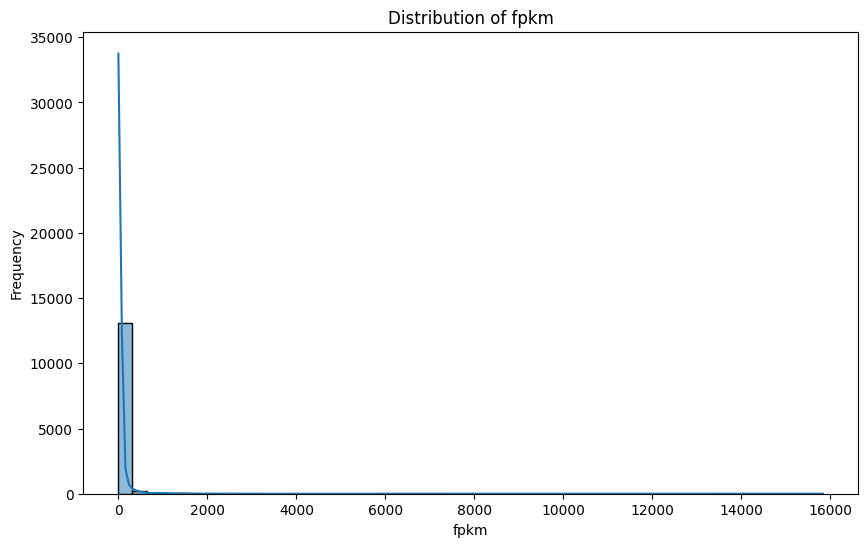

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of fpkm

plt.figure(figsize=(10, 6))
sns.histplot(grouped_df['fpkm'], bins=50, kde=True)
plt.title('Distribution of fpkm')
plt.xlabel('fpkm')
plt.ylabel('Frequency')
plt.show()

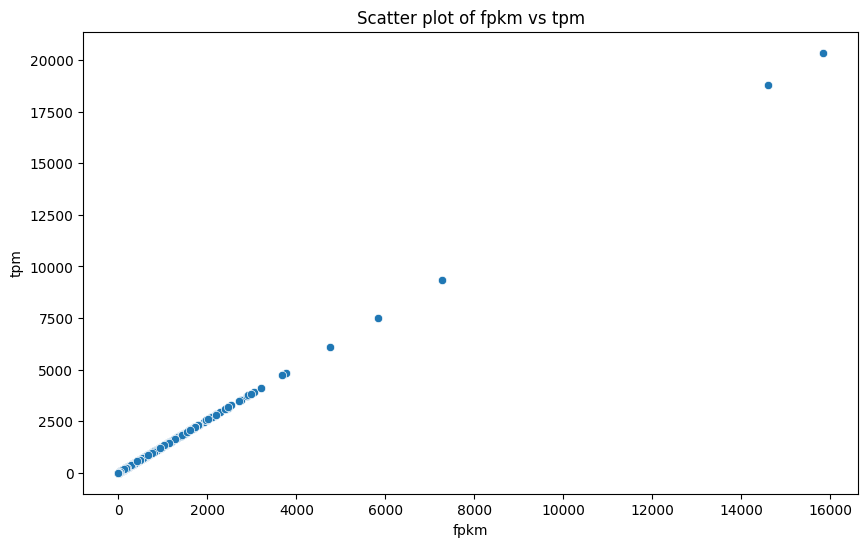

In [58]:
# Scatter plot for fpkm vs tpm

plt.figure(figsize=(10, 6))
sns.scatterplot(x='fpkm', y='tpm', data=grouped_df)
plt.title('Scatter plot of fpkm vs tpm')
plt.xlabel('fpkm')
plt.ylabel('tpm')
plt.show()

# Bioinformatics Application
## Identifying highly expressed genes


In [59]:
# Top 10 genes with the highest fpkm values
top_genes = df_cleaned.nlargest(10, 'fpkm')[['gene_symbol', 'fpkm', 'tpm']]

top_genes


,gene_symbol,fpkm,tpm
2020,pvalb2,15837.823540,20361.130810
319,pvalb1,14610.461200,18783.231850
4039,actc1b,7265.205464,9340.159549
5540,eef1a1l1,5840.350464,7508.363724
3904,tmsb4x,4754.091861,6111.867959
9814,rps29,3773.593923,4851.338271
9446,rpl19,3721.498274,4784.364023
1574,zgc:171772,3686.743892,4739.683735
13892,zgc:158463,3203.569885,4118.514472
4764,actb2,3050.986748,3922.353352


In [61]:
# Top 10 genes with the highest fpkm values
top_genes = df_cleaned.nlargest(10, 'fpkm')[['gene_symbol', 'fpkm', 'tpm']]

# Normalize read_count by the total read count
df_cleaned['read_count_normalized'] = df_cleaned['read_count'] / df_cleaned['read_count'].sum()

# Verify the normalization
normalized_data = df_cleaned[['gene_symbol', 'read_count', 'read_count_normalized']].head()

top_genes, normalized_data


<ipython-input-61-c77f85664f22>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['read_count_normalized'] = df_cleaned['read_count'] / df_cleaned['read_count'].sum()


(      gene_symbol          fpkm           tpm
 2020       pvalb2  15837.823540  20361.130810
 319        pvalb1  14610.461200  18783.231850
 4039       actc1b   7265.205464   9340.159549
 5540     eef1a1l1   5840.350464   7508.363724
 3904       tmsb4x   4754.091861   6111.867959
 9814        rps29   3773.593923   4851.338271
 9446        rpl19   3721.498274   4784.364023
 1574   zgc:171772   3686.743892   4739.683735
 13892  zgc:158463   3203.569885   4118.514472
 4764        actb2   3050.986748   3922.353352,
   gene_symbol  read_count  read_count_normalized
 0       rpl24      9329.0               0.000491
 1      paqr5a       194.0               0.000010
 2  zgc:110091       604.0               0.000032
 3     tmem39a       537.0               0.000028
 4      pla2g7       549.0               0.000029)

The top 10 genes with the highest fpkm values are identified. For example, pvalb2 has the highest fpkm value of 15,837.82.



31